# Machine Learning Lab

# Lab 6

# Simran Kaur

# 311443

# Exercise 0: Dataset Preprocessing

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(3116)
import warnings
warnings.filterwarnings('ignore')

Initializing x and y for D1

In [433]:
def D1():
    x = np.random.normal(1, 0.05, size = (100,1))
    phi = np.random.rand(100, 1)
    y = np.zeros((100, 1))
    y = 1.3*(x**2) + 4.8*x + 8*np.ones((100,1)) + phi
    return x, y
    

In [514]:
x, y = D1()

Dataframe D2

In [515]:
D2 = pd.read_csv("winequality-red.csv",sep=";")

In [516]:
D2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Later I have used Scikit tools to preprocess data such as normalizing data columns where required.

# Exercise 1: Generalized Linear Models with Scikit Learn

Now we will be implementing stochastic gradient descent on different linear models.

In [406]:
from sklearn import datasets, svm, metrics

For this task we will be using dataframe D2

Converting dataframe into numpy matrix.

In [437]:
D2 = D2.to_numpy()
D2

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

Splitting the data into training and test set in the ratio 80%:20%.

In [408]:
def split(file):
    r, c = np.shape(file)
    size = int(0.8*r)
    train = file[0:size, :]
    test = file[size :, :]
    return train, test

Extracting feature and target vector for the training and test set.

In [409]:
D2_train, D2_test = split(D2)

D2_train_feature = D2_train[:, :-1]
D2_train_target = D2_train[:, -1].reshape(-1,1)
D2_test_feature = D2_test[:, :-1]
D2_test_target = D2_test[:, -1].reshape(-1,1)

Importing Libraries to be used:-

In [410]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

The hyperparameters that we consider here are $\alpha$ for step length, $\lambda$ for regularization and number of iterations.
For ordinary least squares we will consider $\alpha$ and number of iterations and for the other two we will be taking $\alpha$ and $\lambda$ into consideration. 

In [521]:
alpha_set = [0.1, 0.5, 0.01]
lambda_set = [np.exp(-5), np.exp(-8), np.exp(-10)]
n_iter = [100, 200, 300]

Below we have a function which takes input as the model m, $\alpha$, $\lambda$ and number of iteration and returns the RMSE for training and test for the respective model.

In [522]:
def linear_models(m, alp, reg, niter):
    if m == "OLS":     # for the ordinary least squares model
        regOLS = make_pipeline(StandardScaler(), SGDRegressor(alpha = reg, max_iter = niter, tol = 1e-3, 
                                                      learning_rate = 'constant', eta0 = alp)) 
                 # In the SGDRegressor alpha refers to regularization parameter and eta0 to step length
        OLS_fit = regOLS.fit(D2_train_feature, D2_train_target)
        D2_train_pred_OLS = OLS_fit.predict(D2_train_feature)
        D2_test_pred_OLS = OLS_fit.predict(D2_test_feature)
        rmse_train_OLS = (mean_squared_error(D2_train_target, D2_train_pred_OLS))**(0.5)
        rmse_test_OLS = (mean_squared_error(D2_test_target, D2_test_pred_OLS))**(0.5)
        
        return rmse_train_OLS, rmse_test_OLS
        
    elif m == "RR":    # for the ridge regression
        regRR = make_pipeline(StandardScaler(), SGDRegressor(alpha = reg, max_iter = 100, tol = 1e-3, 
                                                      learning_rate = 'constant', eta0 = alp))
        RR_fit = regRR.fit(D2_train_feature, D2_train_target)
        D2_train_pred_RR = RR_fit.predict(D2_train_feature)
        D2_test_pred_RR = RR_fit.predict(D2_test_feature)
        rmse_train_RR = (mean_squared_error(D2_train_target, D2_train_pred_RR))**(0.5)
        rmse_test_RR = (mean_squared_error(D2_test_target, D2_test_pred_RR))**(0.5)
        
        return rmse_train_RR, rmse_test_RR
        
    elif m == "L":    # for the Lasso
        regL = make_pipeline(StandardScaler(), SGDRegressor(penalty = 'l1', alpha = reg, max_iter = 100, tol = 1e-3, 
                                                      learning_rate = 'constant', eta0 = alp))
        L_fit = regL.fit(D2_train_feature, D2_train_target)
        D2_train_pred_L = L_fit.predict(D2_train_feature)
        D2_test_pred_L = L_fit.predict(D2_test_feature)
        rmse_train_L = (mean_squared_error(D2_train_target, D2_train_pred_L))**(0.5)
        rmse_test_L = (mean_squared_error(D2_test_target, D2_test_pred_L))**(0.5)
        
        return rmse_train_L, rmse_test_L

The function defined below takes the model as input and plot the RMSE for training and test for each pair of hyperparameters.

In [622]:
def plot_error(m):
    rmse_TR_OLS = []
    rmse_TS_OLS = []
    rmse_TR_RR = []
    rmse_TS_RR = []
    rmse_TR_L = []
    rmse_TS_L = []
    if m == "OLS":           # for ordinary least squares
        for alp in alpha_set:
            for n in n_iter:                     # checking for each possible combination of alpha and iterations
                rmse_TR_OLS.append(linear_models(m, alp, 0, n)[0])
                rmse_TS_OLS.append(linear_models(m, alp, 0, n)[1])
        X, Y = np.meshgrid(alpha_set, n_iter)
        U = np.array(rmse_TR_OLS).reshape(3,3)
        V = np.array(rmse_TS_OLS).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('iteration')
        plt.legend()


    elif m == "RR":           # for ridge regression
        for alp in alpha_set:
            for reg in lambda_set:        # checking for each possible combination of alpha and lambda
                rmse_TR_RR.append(linear_models(m, alp, reg, 0)[0])
                rmse_TS_RR.append(linear_models(m, alp, reg, 0)[1])
        X, Y = np.meshgrid(alpha_set, lambda_set)
        U = np.array(rmse_TR_RR).reshape(3,3)
        V = np.array(rmse_TS_RR).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('lambda')
        plt.legend()

    elif m == "L":           # for Lasso
        for alp in alpha_set:
            for reg in lambda_set:         # checking for each possible combination of alpha and lambda
                rmse_TR_L.append(linear_models(m, alp, reg, 0)[0])
                rmse_TS_L.append(linear_models(m, alp, reg, 0)[1])
        X, Y = np.meshgrid(alpha_set, lambda_set)
        U = np.array(rmse_TR_L).reshape(3,3)
        V = np.array(rmse_TS_L).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('lambda') 
        plt.legend()

Plotting RMSE for the ordinary least square model for both training and test set as the value of $\alpha$ and number of iterations varies.

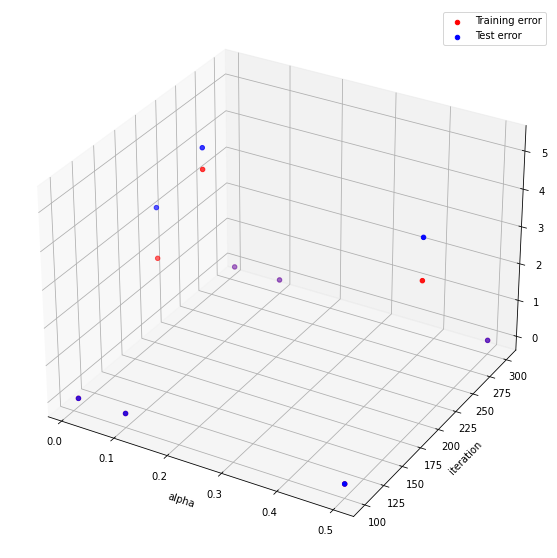

In [623]:
plot_error("OLS")

For the ordinary least squares, for the different values of step length $\alpha$ and number of iterations we have plotted error for both training and test set. As we can see from the plot the error is less for small values of alpha for both traing and test set. Same is true for large number of iterations. For the values of alpha which is large and when the number of iterations is less the training error is less as compared to test error.

Plotting RMSE for the Ridge Regression model for both training and test set as the value of $\alpha$ and $\lambda$ varies.

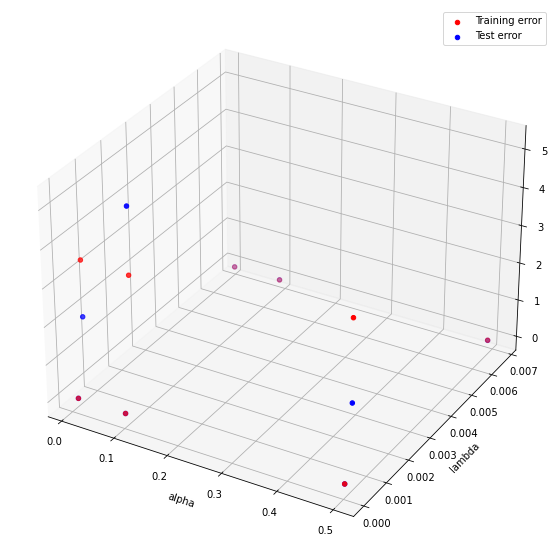

In [624]:
plot_error("RR")

For the Ridge Regression, for the different values of step length $\alpha$ and $\lambda$ we have plotted error for both training and test set. As we can see from the plot the error for both training and test set are approximately the same.
The error is significantly good for values of $\alpha$ which are neither too small nor too large and same is true for $\lambda$ as well.

Plotting RMSE for the Lasso model for both training and test set as the value of $\alpha$ and $\lambda$ varies.

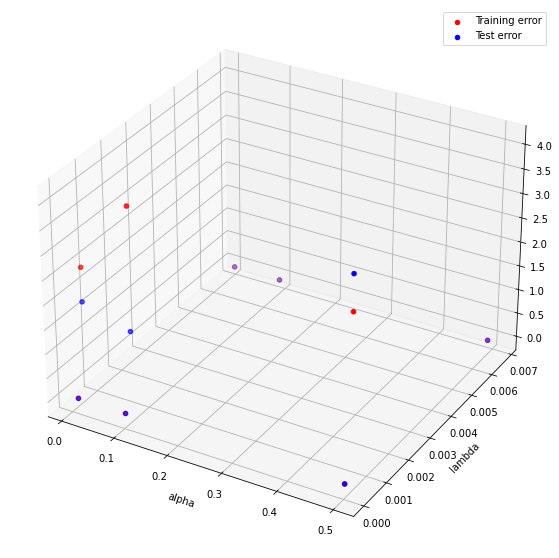

In [625]:
plot_error("L")

For the Lasso Model, for the different values of step length $\alpha$ and $\lambda$ we have plotted error for both training and test set. As we can see from the plot the error for both training is somewhat greater than the error on the test set.
The error is significantly good for values of $\alpha$ which are neither too small nor too large and same is true for $\lambda$ as well.

Tuning the hyperparameters using GridSearchCV

In [635]:
from sklearn.model_selection import GridSearchCV

def hyperpara_tuning(m):
    if m == "OLS":
        param_OLS = {'eta0': alpha_set, 'max_iter': n_iter}
        gridOLS = GridSearchCV(SGDRegressor(alpha = 0,
                                        learning_rate = 'constant'),param_grid = param_OLS, cv = 5, return_train_score= True)
                                                                              # cv = 5 means 5 fold cross validation
        gridOLS.fit(D2_train_feature, D2_train_target)
        rmse_tr_OLS = gridOLS.cv_results_['mean_train_score']
        rmse_ts_OLS = gridOLS.cv_results_['mean_test_score']
        X, Y = np.meshgrid(alpha_set, n_iter)
        U = np.array(rmse_tr_OLS).reshape(3,3)
        V = np.array(rmse_ts_OLS).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('iteration')
        plt.legend()
        return gridOLS.best_params_["eta0"], gridOLS.best_params_["max_iter"]   # returns the best alpha and iteration
    
    elif m == "RR":
        param_RR = {'eta0': alpha_set, 'alpha': lambda_set}
        gridRR = GridSearchCV(SGDRegressor(max_iter = 100,
                                            learning_rate = 'constant'),param_grid = param_RR, cv = 5, return_train_score= True)
        gridRR.fit(D2_train_feature, D2_train_target)
        rmse_tr_RR = gridRR.cv_results_['mean_train_score']
        rmse_ts_RR = gridRR.cv_results_['mean_test_score']
        X, Y = np.meshgrid(alpha_set, lambda_set)
        U = np.array(rmse_tr_RR).reshape(3,3)
        V = np.array(rmse_ts_RR).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('lambda')
        plt.legend()
        return gridRR.best_params_["eta0"], gridRR.best_params_["alpha"]      # returns the best alpha and lambda
 
    elif m == "L":        
        param_L = {'eta0': alpha_set, 'alpha': lambda_set}
        gridL = GridSearchCV(SGDRegressor(penalty = 'l1', max_iter = 100,
                                            learning_rate = 'constant'),param_grid = param_L, cv = 5, return_train_score= True)
        gridL.fit(D2_train_feature, D2_train_target)
        rmse_tr_L = gridL.cv_results_['mean_train_score']
        rmse_ts_L = gridL.cv_results_['mean_test_score']
        X, Y = np.meshgrid(alpha_set, lambda_set)
        U = np.array(rmse_tr_L).reshape(3,3)
        V = np.array(rmse_ts_L).reshape(3,3)
        ax = plt.axes(projection='3d')
        ax.scatter3D(X, Y, U,c="r", label = "Training error")
        ax.scatter3D(X, Y, V,c="b", label = "Test error")
        ax.set_xlabel('alpha')
        ax.set_ylabel('lambda')
        plt.legend()
        return gridL.best_params_["eta0"], gridL.best_params_["alpha"]    # returns the best alpha and lambda

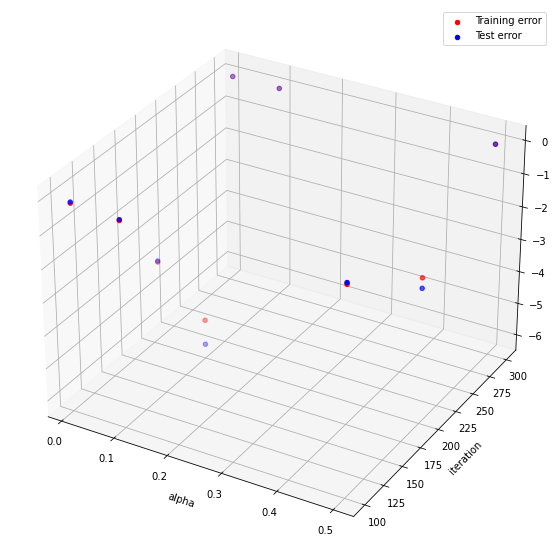

In [627]:
best_alpha_OLS, best_iter_OLS = hyperpara_tuning("OLS")

Error on the training and test set for the best pair of hyperparameters for the ordinary least square model.

In [629]:
print("Error on training set: ", linear_models("OLS", best_alpha_OLS, 0, best_iter_OLS)[0])
print("Error on test set: ", linear_models("OLS", best_alpha_OLS, 0, best_iter_OLS)[1])

Error on training set:  0.6648639401965393
Error on test set:  0.6852383939236227


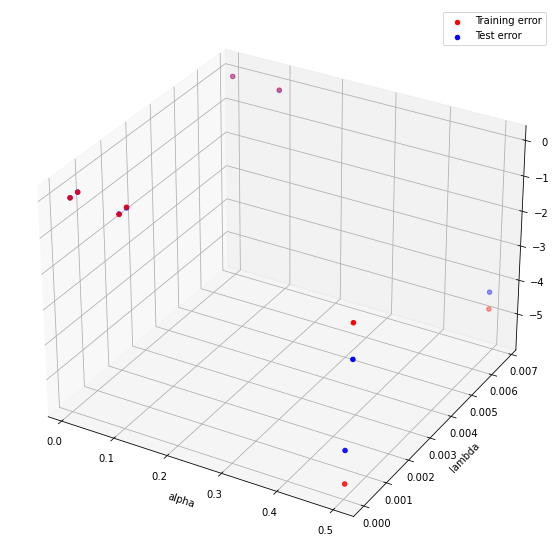

In [630]:
best_alpha_RR, best_lambda_RR = hyperpara_tuning("RR")

Error on the training and test set for the best pair of hyperparameters for the Ridge Regression model.

In [633]:
print("Error on training set: ", linear_models("RR", best_alpha_RR, best_lambda_RR, 100)[0])
print("Error on test set: ", linear_models("RR", best_alpha_RR, best_lambda_RR, 100)[1])

Error on training set:  0.6597533787211206
Error on test set:  0.6309663763087204


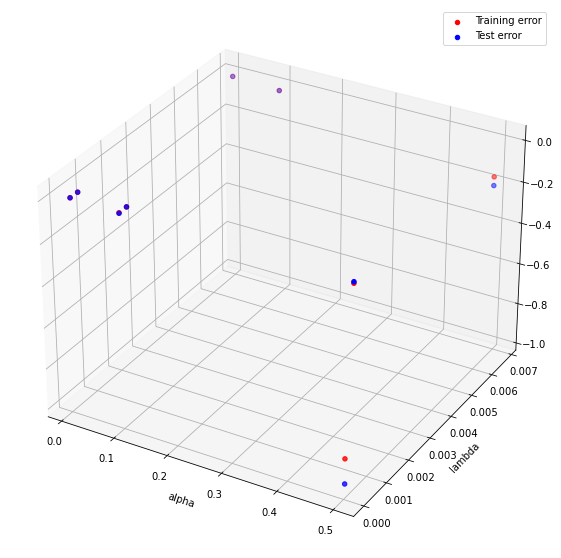

In [632]:
best_alpha_L, best_lambda_L = hyperpara_tuning("L")

Error on the training and test set for the best pair of hyperparameters for the Lasso model.

In [634]:
print("Error on training set: ", linear_models("L", best_alpha_L, best_lambda_L, 100)[0])
print("Error on test set: ", linear_models("L", best_alpha_L, best_lambda_L, 100)[1])

Error on training set:  0.6613135775509452
Error on test set:  0.6411570963821666


The error on the test set is least for the Ridge regression model = 0.63096 and maximum on the Ordinary least squre model = 0.68523.

# Exercise 2: Higher Order Polynomial Regression

Task A: Prediction with high degree of polynomials

In [454]:
D1_x = x
D1_y = y

In [456]:
m = D1_x.shape[0]
s = int(0.8*m)

D1_train_feature = D1_x[: s, :]
D1_train_target = D1_y[:s, :]
D1_test_feature = D1_x[s:, :]
D1_test_target = D1_y[s:, :]

In [341]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Fitting polynomials of different degrees to our dataset and learning the model using linear Regression.

In [612]:
X_seq = np.linspace(D1_x.min(),D1_x.max(),300).reshape(-1,1)    # for plotting the x-axis is taken as follows

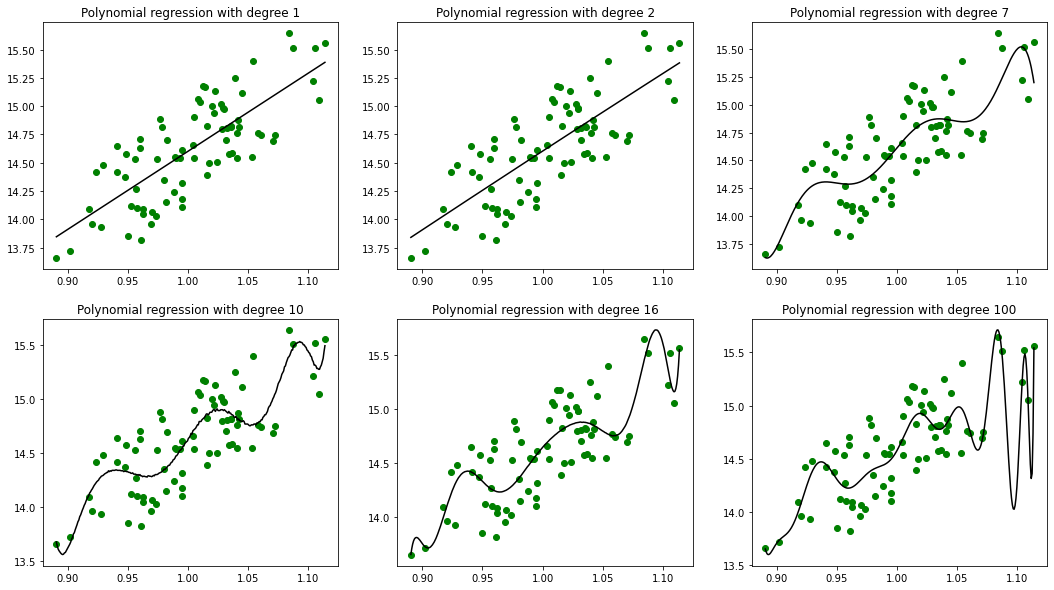

In [617]:
ax = plt.figure(figsize= (18, 10))
degrees = [1, 2, 7, 10, 16, 100]
for ind,d in enumerate(degrees):
    plt.subplot(2, 3, ind+1)
    polyreg = make_pipeline(PolynomialFeatures(d),LinearRegression())
    polyreg.fit(D1_train_feature, D1_train_target)
    plt.title("Polynomial regression with degree {}".format(d))
    plt.scatter(D1_train_feature, D1_train_target, c = "g")
    plt.plot(X_seq, polyreg.predict(X_seq),color="black")
plt.show()
                     

Here we have predicted the model using the training data and the predicted model is plotted for the training set along the target values of the training set. As we increase the degree of polynomial, we can see the model tries to fit the training data as much as possible rather than catching the general trend. The problem with such a model is that when we apply this model to our test set it will not work that properly. 

This can be seen below:

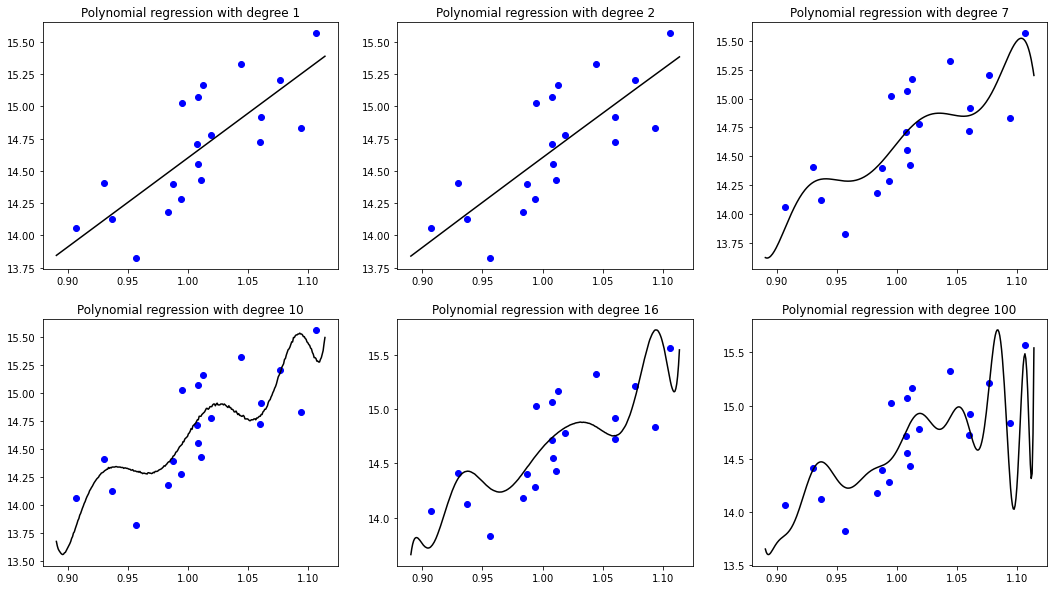

In [619]:
ax = plt.figure(figsize= (18, 10))
degrees = [1, 2, 7, 10, 16, 100]
for ind,d in enumerate(degrees):
    plt.subplot(2, 3, ind+1)
    polyreg = make_pipeline(PolynomialFeatures(d),LinearRegression())
    polyreg.fit(D1_train_feature, D1_train_target)
    plt.title("Polynomial regression with degree {}".format(d))
    plt.scatter(D1_test_feature, D1_test_target, c = "b")
    plt.plot(X_seq, polyreg.predict(X_seq),color="black")
plt.show()

For this problem, we have fixed the degree of the polynomial to be 10. We have taken four values of $\lambda$ and we will see the effect of different lambda's on the predicted curves.

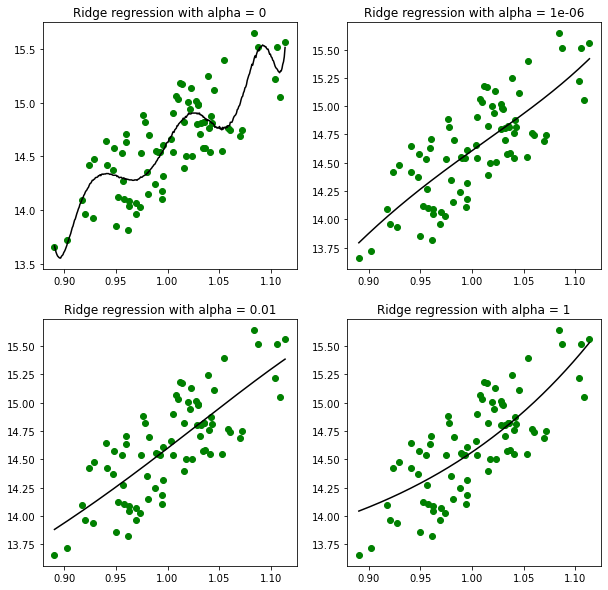

In [620]:
lambda_list = [0, 10**(-6), 10**(-2), 1]
for ind, a in enumerate(lambda_list):
    plt.subplot(2, 2, ind+1)
    polyreg_alpha = make_pipeline(PolynomialFeatures(10), Ridge(alpha = a))
    polyreg_alpha.fit(D1_train_feature, D1_train_target)
    plt.title("Ridge regression with alpha = {}".format(a))
    plt.scatter(D1_train_feature, D1_train_target, c = "g")
    plt.plot(X_seq, polyreg_alpha.predict(X_seq),color="black")
plt.show()

Here we have predicted the model using the training data and the predicted model is plotted for the training set along the target values of the training set. As we increase the value of $\lambda$, we observe the following things:

For $\lambda$ = 0, there is no penalty and hence it has no effect.

for $\lambda$ = 10**(-6), the effect will be again negligible for very small values of $\lambda$.

Similarly, for large values of $\lambda$, the penalty is high and thus the model penalizes the beta's too much. Thus the best value so far is 10**(-2).
 
Next we plot the model along with test values.
This can be seen below:

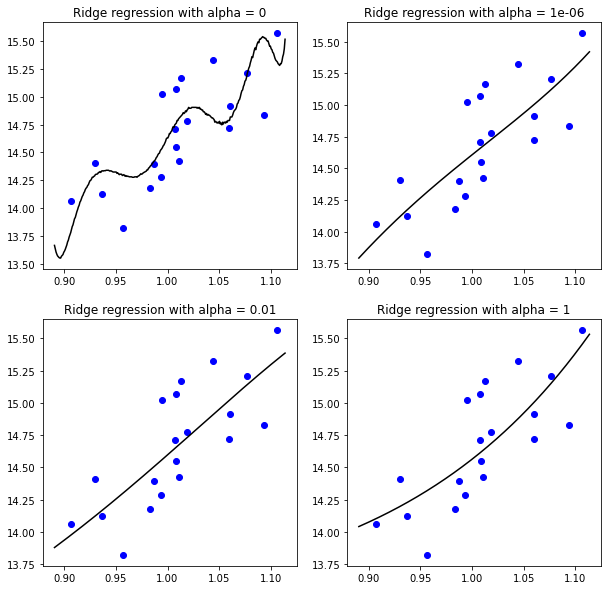

In [621]:
for ind, a in enumerate(lambda_list):
    plt.subplot(2, 2, ind+1)
    polyreg_alpha = make_pipeline(PolynomialFeatures(10), Ridge(alpha = a))
    polyreg_alpha.fit(D1_train_feature, D1_train_target)
    plt.title("Ridge regression with alpha = {}".format(a))
    plt.scatter(D1_test_feature, D1_test_target, c = "b")
    plt.plot(X_seq, polyreg_alpha.predict(X_seq),color="black")
plt.show()

# Exercise 3: Implementing Coordinate Descent

Coordinate Descent

In [467]:
# Loss function
def loss_f(X, Y, b):
    return np.sum((Y - np.dot(X, b))**2)    

In [468]:
# This function returns the function g to be used in cordinate descent
def CD_g(X, Y, b, k):
    l = [i  for i in range(X.shape[1]) if i!= k]
    X_notk = X[:, l]
    b_notk = b[l, :]
    g_k = np.dot(((Y - np.dot(X_notk, b_notk)).T), X[:, k])/np.dot(X[:, k].T, X[:, k])
    return g_k    

In [549]:
#  This function applies cordinate descent to find beta's
def min_CD(X, Y, i_max):
    b = np.zeros((X.shape[1], 1))
    b_n = np.zeros((X.shape[1], 1))
    b0 = np.zeros((i_max, X.shape[1]))    # b0 is a matrix where each row gives the beta's for different iterations.
    for i in range(i_max):
        for n in range(b.shape[0]):
            b_n[n] = CD_g(X, Y, b, n)  
            b[n] = b_n[n]
            b0[i, n] = b_n[n]
    return b_n, b0        
               

In [550]:
bias_col = np.ones((D2.shape[0], 1))
CD_D2 = np.append(bias_col, D2, axis=1)
CD_D2

array([[ 1.   ,  7.4  ,  0.7  , ...,  0.56 ,  9.4  ,  5.   ],
       [ 1.   ,  7.8  ,  0.88 , ...,  0.68 ,  9.8  ,  5.   ],
       [ 1.   ,  7.8  ,  0.76 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 1.   ,  6.3  ,  0.51 , ...,  0.75 , 11.   ,  6.   ],
       [ 1.   ,  5.9  ,  0.645, ...,  0.71 , 10.2  ,  5.   ],
       [ 1.   ,  6.   ,  0.31 , ...,  0.66 , 11.   ,  6.   ]])

In [551]:
CD_D2_train, CD_D2_test = split(CD_D2)

CD_D2_train_feature = CD_D2_train[:, :-1]
CD_D2_train_target = CD_D2_train[:, -1].reshape(-1,1)
CD_D2_test_feature = CD_D2_test[:, :-1]
CD_D2_test_target = CD_D2_test[:, -1].reshape(-1,1)

Applying cordinate descent to find optimal value of beta.

In [552]:
CD_beta, b0 = min_CD(CD_D2_train_feature, CD_D2_train_target, 100)

Now we will plot the matrix b0 created above.
For each of the beta's in the vector beta, the plot shows how each of them progress with iterations.
for example, we had beta vector of size 12 starting from $b_{0}$ to $b_{11}$, the line plot for each of these shows how they vary as we go from 1st iteration to last.

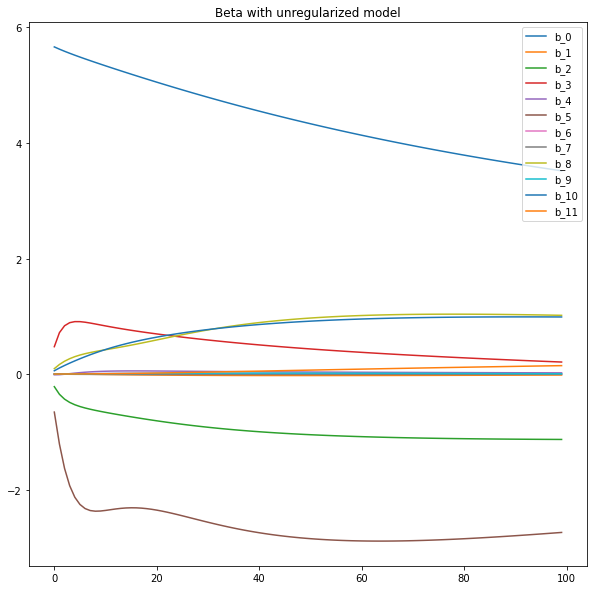

In [568]:
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(b0.shape[1]):
    plt.plot(b0[:, i], label = f'b_{i}')   
plt.title("Beta with unregularized model")    
plt.legend()
plt.show()

Coordinate Descent with L1 Regularization

In [555]:
# Softmax function
def soft(a, b):
    if a > b:
        return a - b
    elif a < -b:
        return a + b
    else:
        return 0

In [556]:
# Loss function with regularization
def loss_f_reg(X, Y, b, reg):
    return np.sum((Y - np.dot(X, b))**2) + reg*np.sum(abs(b))

In [557]:
# This function returns the function g to be used in cordinate descent with regularization
def CD_g_reg(X, Y, b, k, reg):
    l = [i  for i in range(X.shape[1]) if i!= k]
    X_notk = X[:, l]
    b_notk = b[l, :]
    g_k = soft(np.dot(((Y - np.dot(X_notk, b_notk)).T), X[:, k])/np.dot(X[:, k].T, X[:, k]), 0.5*reg/np.dot(X[:, k].T, X[:, k]))
    return g_k

In [558]:
def min_CD_reg(X, Y, i_max, reg):
    b = np.zeros((X.shape[1], 1))
    b_n = np.zeros((X.shape[1], 1))
    b1 = np.zeros((i_max, X.shape[1]))
    for i in range(i_max):
        for n in range(b.shape[0]):
            b_n[n] = CD_g_reg(X, Y, b, n, reg)  
            b[n] = b_n[n]
            b1[i, n] = b_n[n]
    return b_n, b1   

In [566]:
CD_beta_reg, b1 = min_CD_reg(CD_D2_train_feature, CD_D2_train_target, 100, np.exp(3))

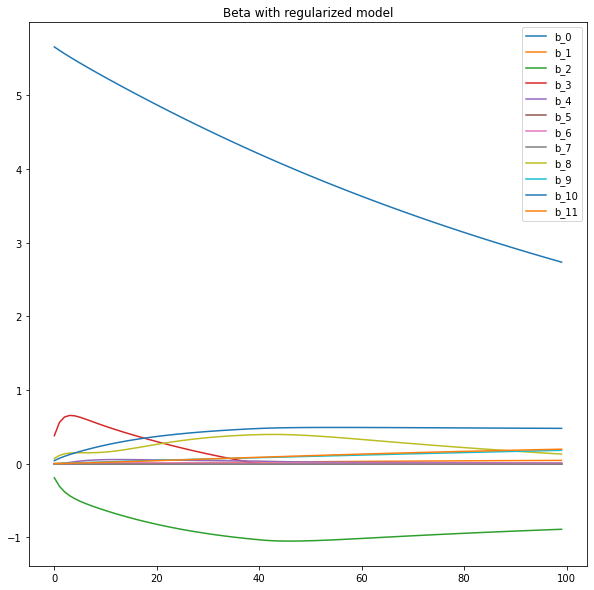

In [569]:
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(b1.shape[1]):
    plt.plot(b1[:, i], label = f'b_{i}')   
plt.title("Beta with regularized model")    
plt.legend()
plt.show()

Task C: Comparison

If we compare the plots from Unregularized vs regularized model, this is what we observe:
1 The values of the vector beta in regularized model has comparatively smaller values as compared to the unregularized model since the aim of the regularization is to give smaller weights to the features that are not that important as compared to the others.

2 As the number of iterations increases, the values in the vector beta for the regularized model converges to zero whereas this is not the case for the unregularized model. This happens because the regularization tends to decrease the complexity of model and thus takes the important beta's only into account.